In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
#uploading the data set
df=pd.read_csv('D:/CodSoft/Data Science/Titanic Dataset.csv')

In [63]:
#Basic Data Summary

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the column names
print("Columns:", df.columns)

# Display the first few rows of the dataset
print("Head:\n", df.head())

# Display the summary statistics of the dataset
print("Summary Statistics:\n", df.describe())

Shape of the dataset: (418, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Head:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        

In [5]:
# Survive is the Target Variable

In [64]:
# Null Value Analysis 

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Sort columns based on the number of missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing value information
print("Missing Values:\n", missing_data)

Missing Values:
        Missing Values  Missing Percentage
Cabin             327           78.229665
Age                86           20.574163
Fare                1            0.239234


In [65]:
# Drop the 'Cabin' column
df = df.drop(columns=['Cabin'], axis=1)


In [66]:
# Impute missing ages based on median age in the same Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


In [67]:
# Impute the missing fare with the median fare
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [68]:
# Calculate IQR for 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers by capping values
df['Age'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


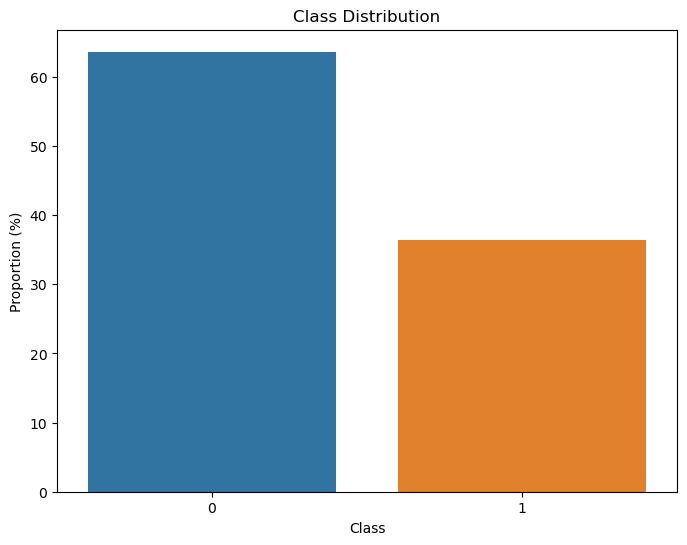

In [69]:
# Checking if the classification is balanced or not?

# Count the occurrences of each class in the target variable
class_counts = df['Survived'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(df) * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_proportions)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion (%)")
plt.show()

In [70]:
# Now using Undersampling technique from resampling to balance 0 and 1

# Separate the majority and minority class examples
majority_class = df[df['Survived'] == 0]
minority_class = df[df['Survived'] == 1]

# Determine the desired number of samples in the majority class
desired_samples = len(minority_class)

# Undersample the majority class
undersampled_majority = majority_class.sample(n=desired_samples, random_state=42)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the undersampled data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)


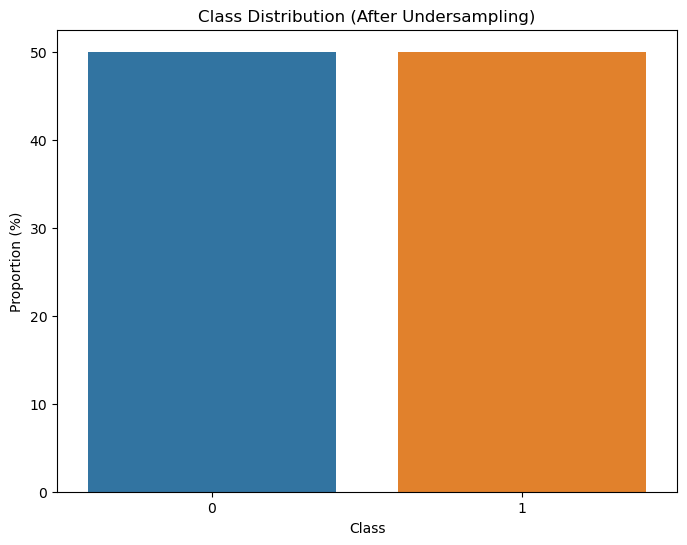

In [17]:
#rechecking if it is balanced

# Count the occurrences of each class in the undersampled data
class_counts = undersampled_data['Survived'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(undersampled_data) * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_proportions)
plt.title("Class Distribution (After Undersampling)")
plt.xlabel("Class")
plt.ylabel("Proportion (%)")
plt.show()

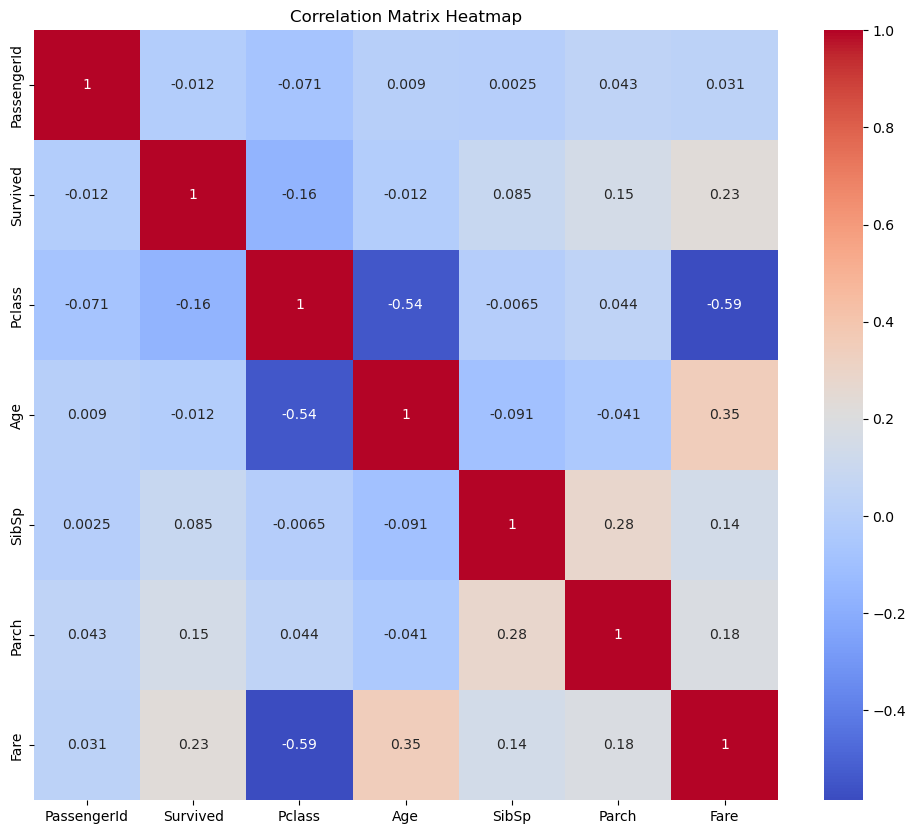

In [71]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(undersampled_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [73]:
# Save the undersampled dataset to a CSV file
undersampled_data.to_csv("D:/CodSoft/Data Science/undersampled_dataset.csv", index=False)

In [74]:
# Identify columns with non-numeric values
categorical_columns = []
for column in undersampled_data.columns:
    if undersampled_data[column].dtype == 'object':  # Check if data type is 'object' (string)
        categorical_columns.append(column)

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Embarked']


In [83]:
# Perform one-hot encoding for non-numeric columns
encoded_data = pd.get_dummies(undersampled_data, columns=categorical_columns)

# Display the first few rows of the encoded data
print(encoded_data.head())

     PassengerId  Survived  Pclass      Age  SibSp  Parch     Fare  \
72           964         1       3  29.0000      0      0   7.9250   
6            898         1       3  30.0000      0      0   7.6292   
137         1029         0       2  26.0000      0      0  13.0000   
249         1141         1       3  24.0000      1      0  14.4542   
236         1128         0       1  56.4375      1      0  75.2500   

     Name_Abelseth, Miss. Karen Marie  Name_Abelseth, Mr. Olaus Jorgensen  \
72                                  0                                   0   
6                                   0                                   0   
137                                 0                                   0   
249                                 0                                   0   
236                                 0                                   0   

     Name_Abrahamsson, Mr. Abraham August Johannes  ...  \
72                                               0  ...  

In [85]:
# Separate the features (X) and target variable (Y)
X = encoded_data.drop('Survived', axis=1)
Y = encoded_data['Survived']

In [86]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for feature scaling
numerical_columns = X.select_dtypes(include=np.number).columns

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [87]:
from sklearn.model_selection import train_test_split

# Split the undersampled dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

from sklearn.svm import SVC

# Initialize Support Vector Machines model
svm = SVC()

from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron (Neural Network) model
mlp = MLPClassifier()


In [89]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
mlp = MLPClassifier()

# Train the models
logistic_regression.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
mlp.fit(X_train, Y_train)

MLPClassifier()

In [90]:
# Make predictions on the testing set
logistic_regression_predictions = logistic_regression.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
mlp_predictions = mlp.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
mlp_accuracy = accuracy_score(Y_test, mlp_predictions)


In [92]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each model
logistic_regression_cm = confusion_matrix(Y_test, logistic_regression_predictions)
decision_tree_cm = confusion_matrix(Y_test, decision_tree_predictions)
random_forest_cm = confusion_matrix(Y_test, random_forest_predictions)
svm_cm = confusion_matrix(Y_test, svm_predictions)
mlp_cm = confusion_matrix(Y_test, mlp_predictions)


In [93]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score for each model
logistic_regression_report = classification_report(Y_test, logistic_regression_predictions)
decision_tree_report = classification_report(Y_test, decision_tree_predictions)
random_forest_report = classification_report(Y_test, random_forest_predictions)
svm_report = classification_report(Y_test, svm_predictions)
mlp_report = classification_report(Y_test, mlp_predictions)


In [94]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC for each model
logistic_regression_roc_auc = roc_auc_score(Y_test, logistic_regression_predictions)
decision_tree_roc_auc = roc_auc_score(Y_test, decision_tree_predictions)
random_forest_roc_auc = roc_auc_score(Y_test, random_forest_predictions)
svm_roc_auc = roc_auc_score(Y_test, svm_predictions)
mlp_roc_auc = roc_auc_score(Y_test, mlp_predictions)


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Evaluate and print the performance of individual models
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm,
    'MLP': mlp
}

for model_name, model in models.items():
    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, predictions)
    cm = confusion_matrix(Y_test, predictions)
    report = classification_report(Y_test, predictions)
    roc_auc = roc_auc_score(Y_test, predictions)

    # Print the evaluation results for each model
    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    print("ROC AUC:", roc_auc)
    print("-----------------------------------\n")


Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ROC AUC: 1.0
-----------------------------------

Model: Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ROC AUC: 1.0
-----------------------------------

Model: Random Forest
Accuracy: 1.0
Confusion M

In [96]:
from sklearn.ensemble import BaggingClassifier

# Initialize the base classifier
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_model.fit(X_train, Y_train)

# Make predictions on the testing set
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the BaggingClassifier
bagging_accuracy = accuracy_score(Y_test, bagging_predictions)
bagging_cm = confusion_matrix(Y_test, bagging_predictions)
bagging_report = classification_report(Y_test, bagging_predictions)
bagging_roc_auc = roc_auc_score(Y_test, bagging_predictions)

# Print the evaluation results for the BaggingClassifier
print("Bagging Ensemble Model")
print("Accuracy:", bagging_accuracy)
print("Confusion Matrix:\n", bagging_cm)
print("Classification Report:\n", bagging_report)
print("ROC AUC:", bagging_roc_auc)


Bagging Ensemble Model
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ROC AUC: 1.0


In [97]:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('MLP', mlp)
]

# Initialize the VotingClassifier
voting_model = VotingClassifier(classifiers)

# Train the VotingClassifier
voting_model.fit(X_train, Y_train)

# Make predictions on the testing set
voting_predictions = voting_model.predict(X_test)

# Evaluate the VotingClassifier
voting_accuracy = accuracy_score(Y_test, voting_predictions)
voting_cm = confusion_matrix(Y_test, voting_predictions)
voting_report = classification_report(Y_test, voting_predictions)
voting_roc_auc = roc_auc_score(Y_test, voting_predictions)

# Print the evaluation results for the VotingClassifier
print("Voting Ensemble Model")
print("Accuracy:", voting_accuracy)
print("Confusion Matrix:\n", voting_cm)
print("Classification Report:\n", voting_report)
print("ROC AUC:", voting_roc_auc)


Voting Ensemble Model
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ROC AUC: 1.0


In [98]:
# Dictionary to store model accuracies
model_accuracies = {
    'Logistic Regression': logistic_regression_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'SVM': svm_accuracy,
    'MLP': mlp_accuracy,
    'Bagging Ensemble': bagging_accuracy,
    'Voting Ensemble': voting_accuracy
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Print the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: Logistic Regression
Best Accuracy: 1.0


In [99]:
from joblib import dump

# Save the best model to a file
dump(bagging_model, 'best_model.joblib')

['best_model.joblib']

In [100]:
from joblib import load

# Load the best model from a file
loaded_model = load('best_model.joblib')

In [101]:
print(loaded_model)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)


In [105]:
# Apply the saved model to make predictions on the new dataset
new_X = encoded_data.drop('Survived', axis=1)  
new_predictions = loaded_model.predict(new_X)

# Print the predictions for the new dataset
print("Predictions for the new dataset:")
print(new_predictions)

Predictions for the new dataset:
[1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0]


In [108]:
# select all data points from the encoded dataset
new_data = encoded_data.sample(n=304, random_state=42)

In [109]:
# Save the undersampled dataset to a CSV file
new_data.to_csv("D:/CodSoft/Data Science/new_data.csv", index=False)